# First Name:.
# Last Name: Kaung Khant Naing


# Import Libraries  

In [1]:
# libraries needs to produce graphs and handling data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 

# Import Data

In [2]:
# opening up the csv file and make an connection with the file
bottle = pd.read_csv('bottle.csv', low_memory=False)
pd.set_option('display.float_format', lambda x: '%f'%x)

# Data management 

In [3]:
# making subsets so that python does not need to use all data
# for understanding the data.

sub1=bottle[(bottle['Cst_Cnt']<=1)]
sub2=sub1.copy()

In [4]:
sub3=bottle[(bottle['Cst_Cnt']==2)]
sub4=sub3.copy()

In [5]:
sub5=bottle[(bottle['Cst_Cnt']<=5)]
sub6=sub5.copy()

In [17]:
# converting necessary variables to to numerics

bottle['RecInd']=pd.to_numeric(bottle['RecInd'], errors='coerce')
bottle['R_Depth']=pd.to_numeric(bottle['R_Depth'], errors='coerce')
bottle['R_TEMP'] = pd.to_numeric(bottle['R_TEMP'], errors='coerce')
bottle['R_PRES'] = pd.to_numeric(bottle['R_PRES'], errors='coerce')
bottle['R_SALINITY'] = pd.to_numeric(bottle['R_SALINITY'], errors='coerce')
bottle['R_SIGMA'] = pd.to_numeric(bottle['R_SIGMA'], errors='coerce')

# Box plot: One Categorical Variable (RecInd) and Quantitative Variable (R_TEMP)

In [19]:
# convert RecInd to category data type and rename from numbers to texts
# so that understandable
# RecInd data shows data that are actually observed
# and that are approximated by scientists theoretically
sub2['RecInd'] = sub2['RecInd'].astype('category')
sub2['RecInd'] = sub2['RecInd'].cat.rename_categories(["Observed Data","Interpolated to a standard depth"])


<IPython.core.display.Javascript object>


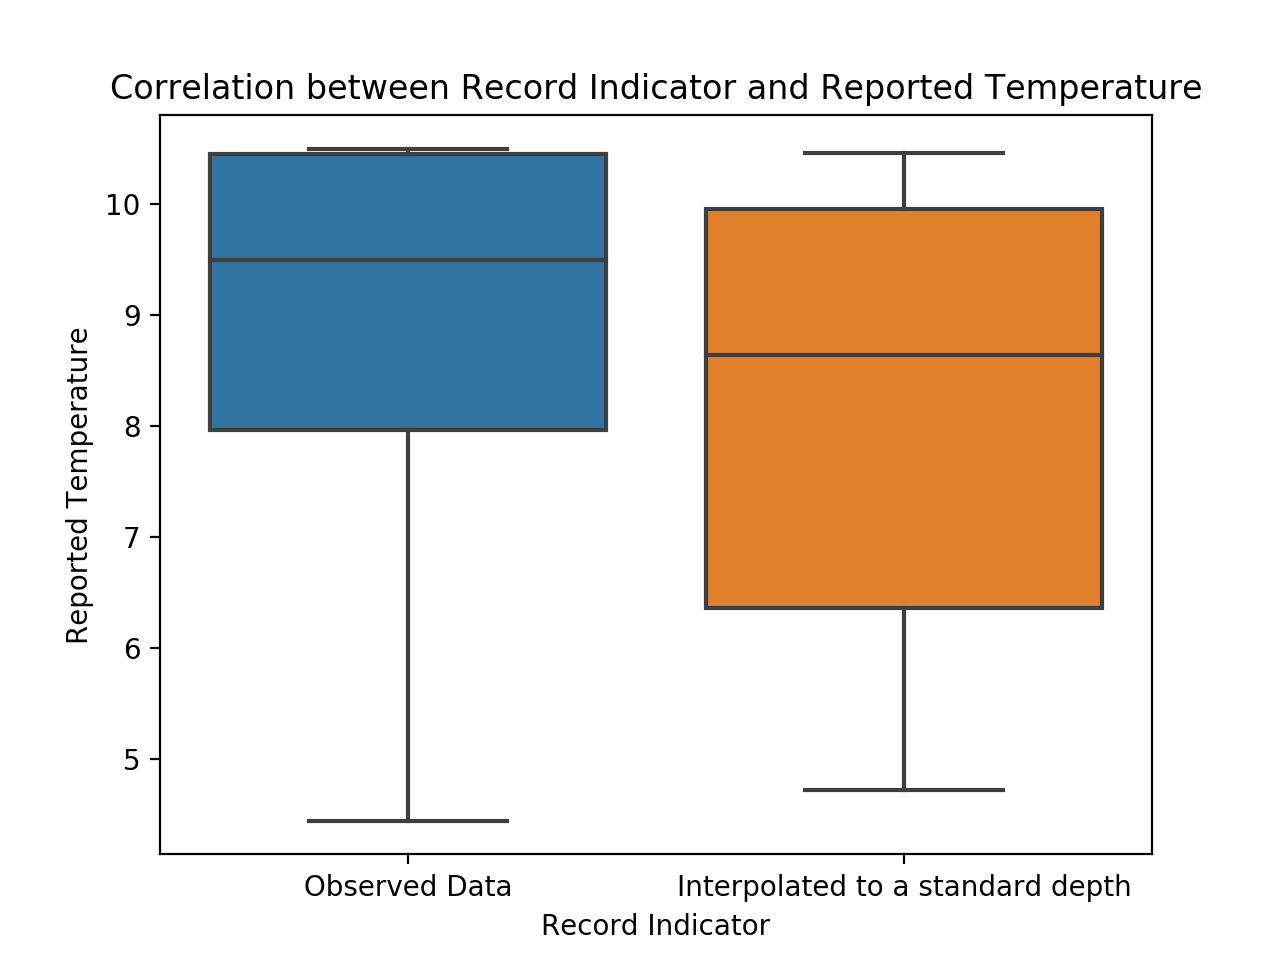

Text(0.5, 1.0, 'Correlation between Record Indicator and Reported Temperature')

In [8]:
%matplotlib notebook
sns.boxplot(x='RecInd',y='R_TEMP', data=sub2)
#box plot labels here
plt.xlabel('Record Indicator')
plt.ylabel('Reported Temperature')
plt.title('Correlation between Record Indicator and Reported Temperature')

# Histogram: One Quantitative Variable (R_TEMP)

<IPython.core.display.Javascript object>


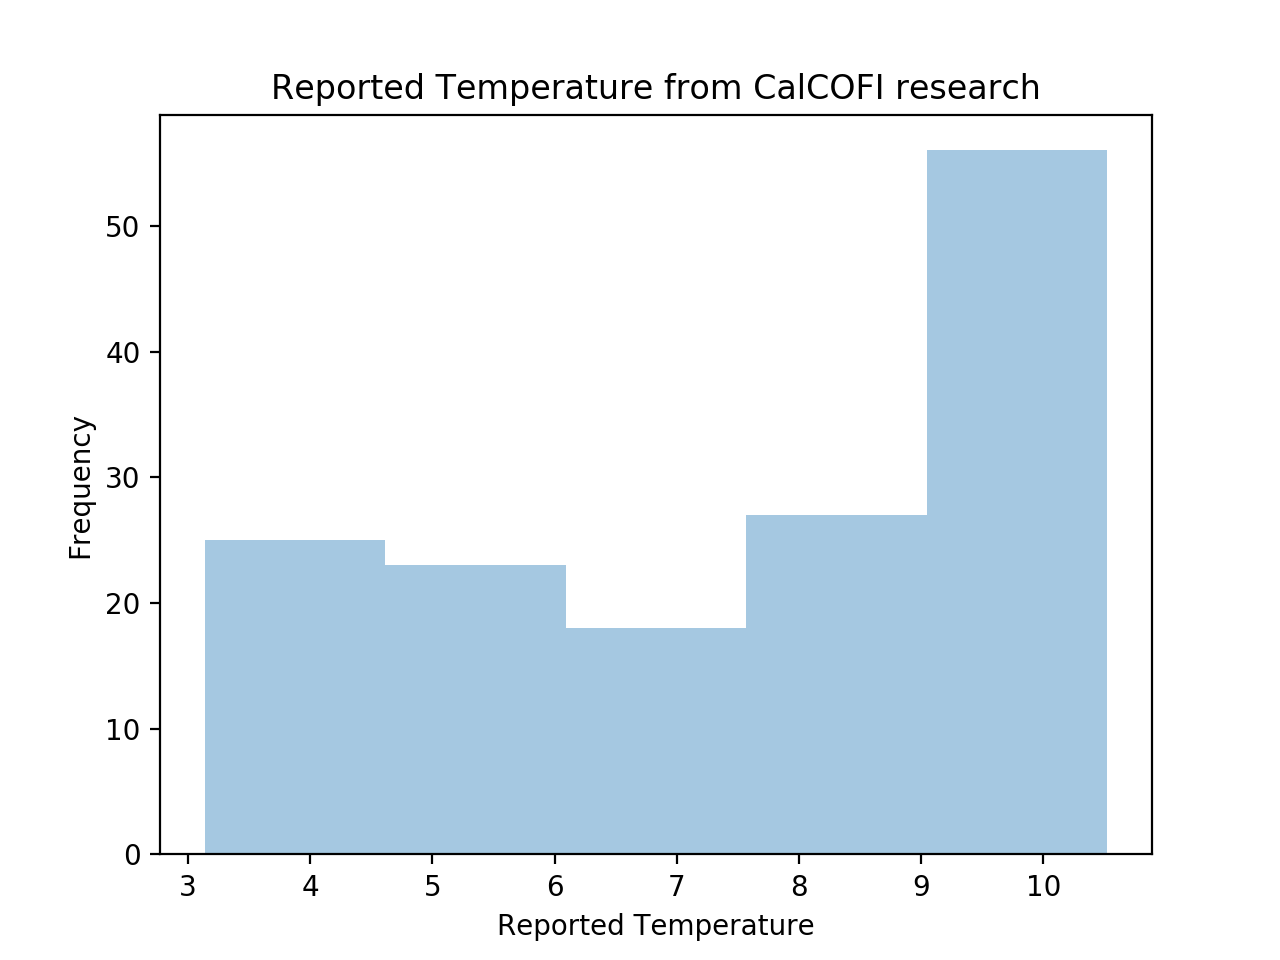

Text(0.5, 1.0, 'Reported Temperature from CalCOFI research')

In [20]:
%matplotlib notebook
# dropna is for ignoring those cells do not have any value in them.
# only used sub6 for the data so that data is easy to understand
sns.distplot(sub6['R_TEMP'].dropna(),kde=False) #kde is for removing density curve
# histogram plot code here
plt.xlabel('Reported Temperature')
plt.ylabel('Frequency')
plt.title('Reported Temperature from CalCOFI research')

# Line chart: One Quantitative Variable (R_SIGMA)

In [21]:
# var = mean number of density of water grouped by depth
var=sub4.groupby(['R_Depth']).R_SIGMA.mean()
print(var)

R_Depth
0      25.330000
10     25.360000
20     25.380000
24     25.400000
30     25.480000
47     25.730000
50     25.760000
71     25.920000
75     25.960000
94     26.120000
100    26.160000
125    26.310000
140    26.380000
150    26.430000
189    26.580000
200    26.600000
250    26.680000
282    26.720000
300    26.730000
379    26.810000
400    26.840000
500    26.960000
565    27.040000
600    27.070000
700    27.160000
800    27.240000
840    27.260000
900    27.290000
1000   27.330000
1100   27.380000
1200   27.420000
1203   27.420000
Name: R_SIGMA, dtype: float64


<IPython.core.display.Javascript object>


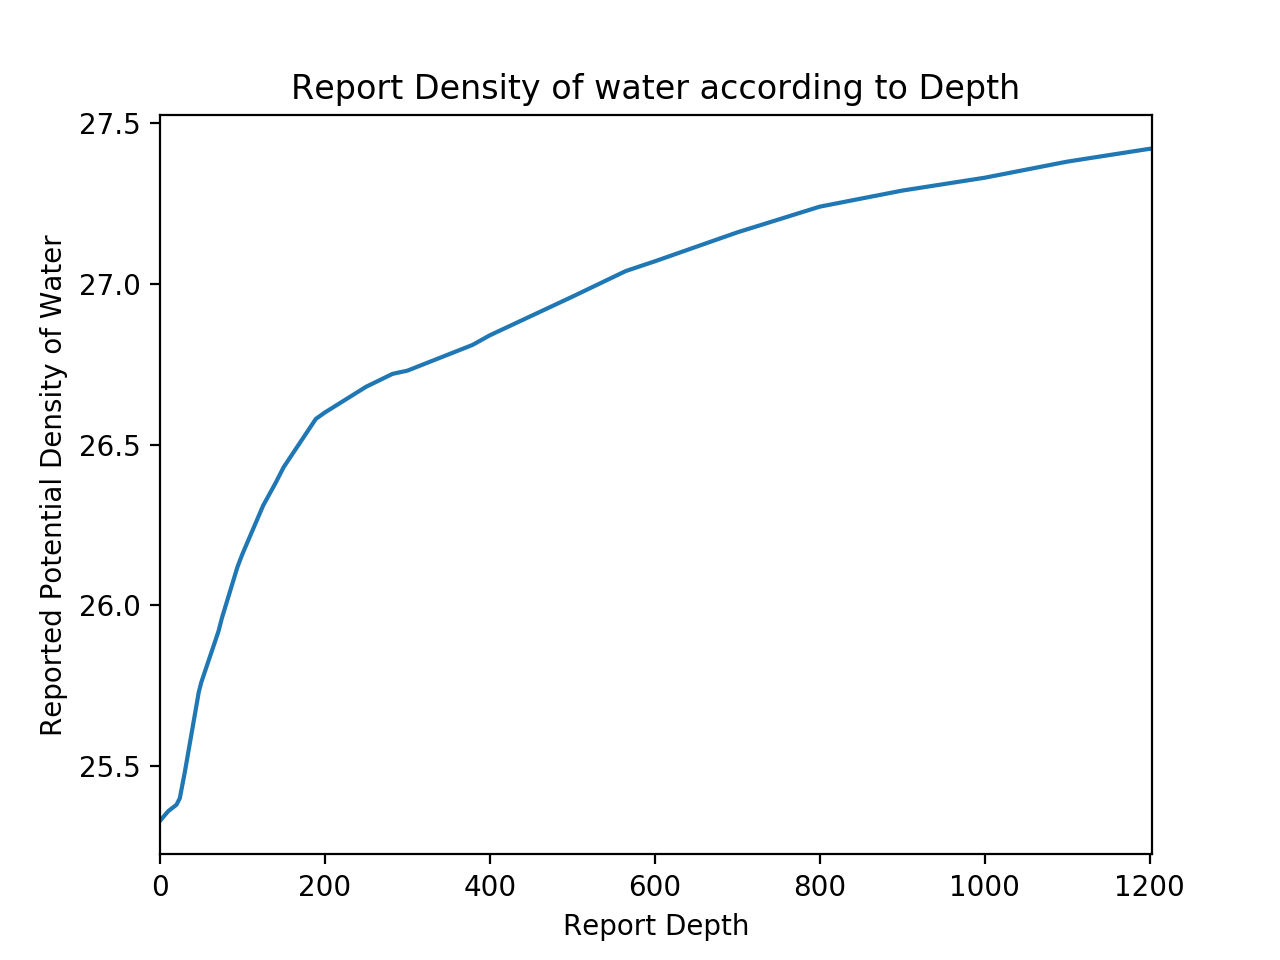

Text(0.5, 1.0, 'Report Density of water according to Depth')

In [22]:
%matplotlib notebook

var.plot(kind='line')

plt.xlabel('Report Depth')
plt.ylabel('Reported Potential Density of Water')
plt.title('Report Density of water according to Depth')


# Bubble chart : x = R_SIGMA, y = R_PRES, s = R_Depth

<IPython.core.display.Javascript object>


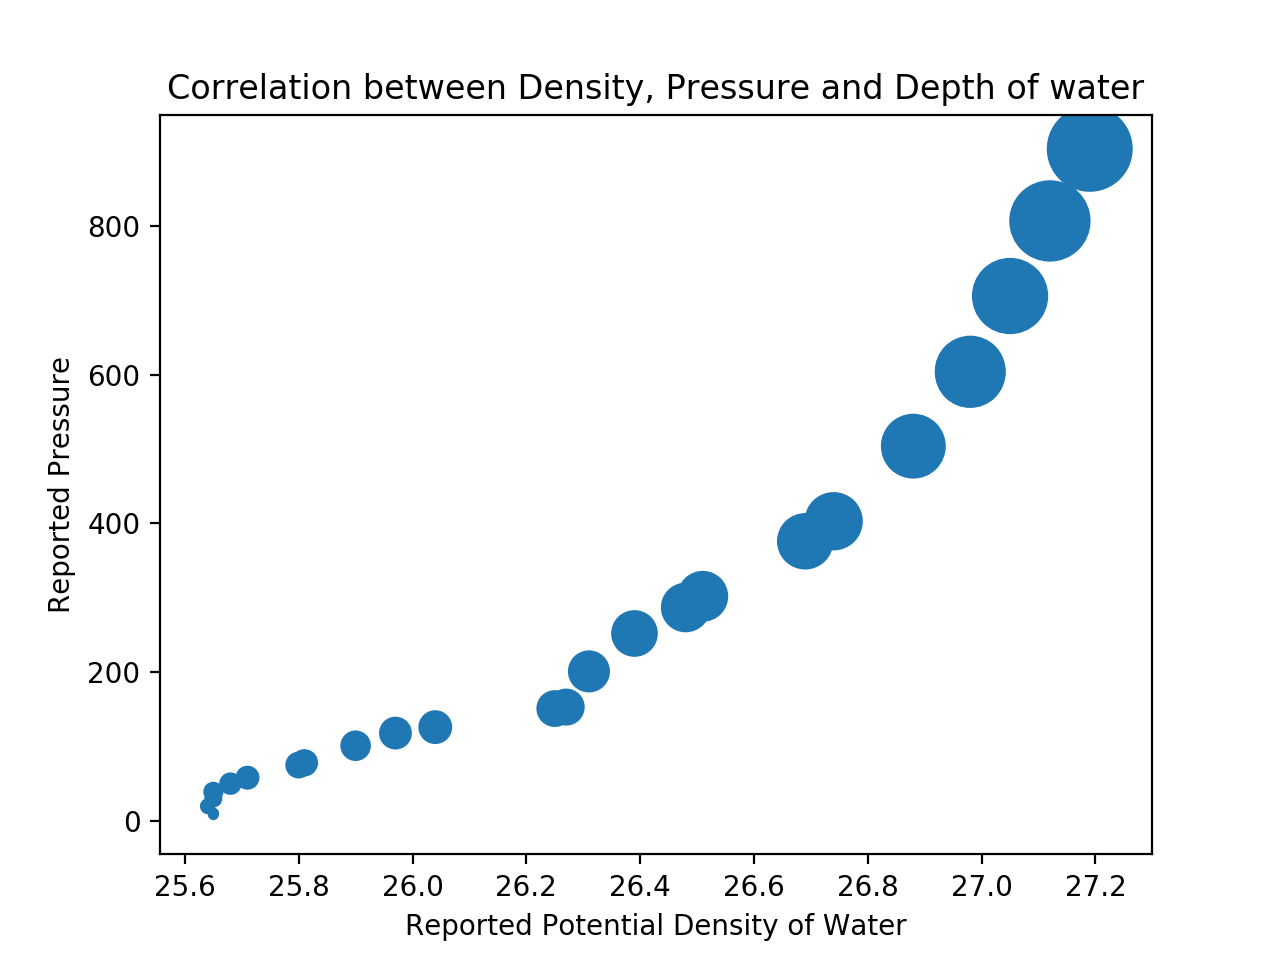

Text(0.5, 1.0, 'Correlation between Density, Pressure and Depth of water')

In [23]:
%matplotlib notebook
fig = plt.figure()
# bubble plot code
plt.scatter(x=sub2['R_SIGMA'], y=sub2['R_PRES'], s=sub2['R_Depth'])
plt.xlabel('Reported Potential Density of Water')
plt.ylabel('Reported Pressure')
plt.title('Correlation between Density, Pressure and Depth of water')

# Select Plot:

# Scatter Plot (x=R_Depth, y=R_SALINITY)

<IPython.core.display.Javascript object>


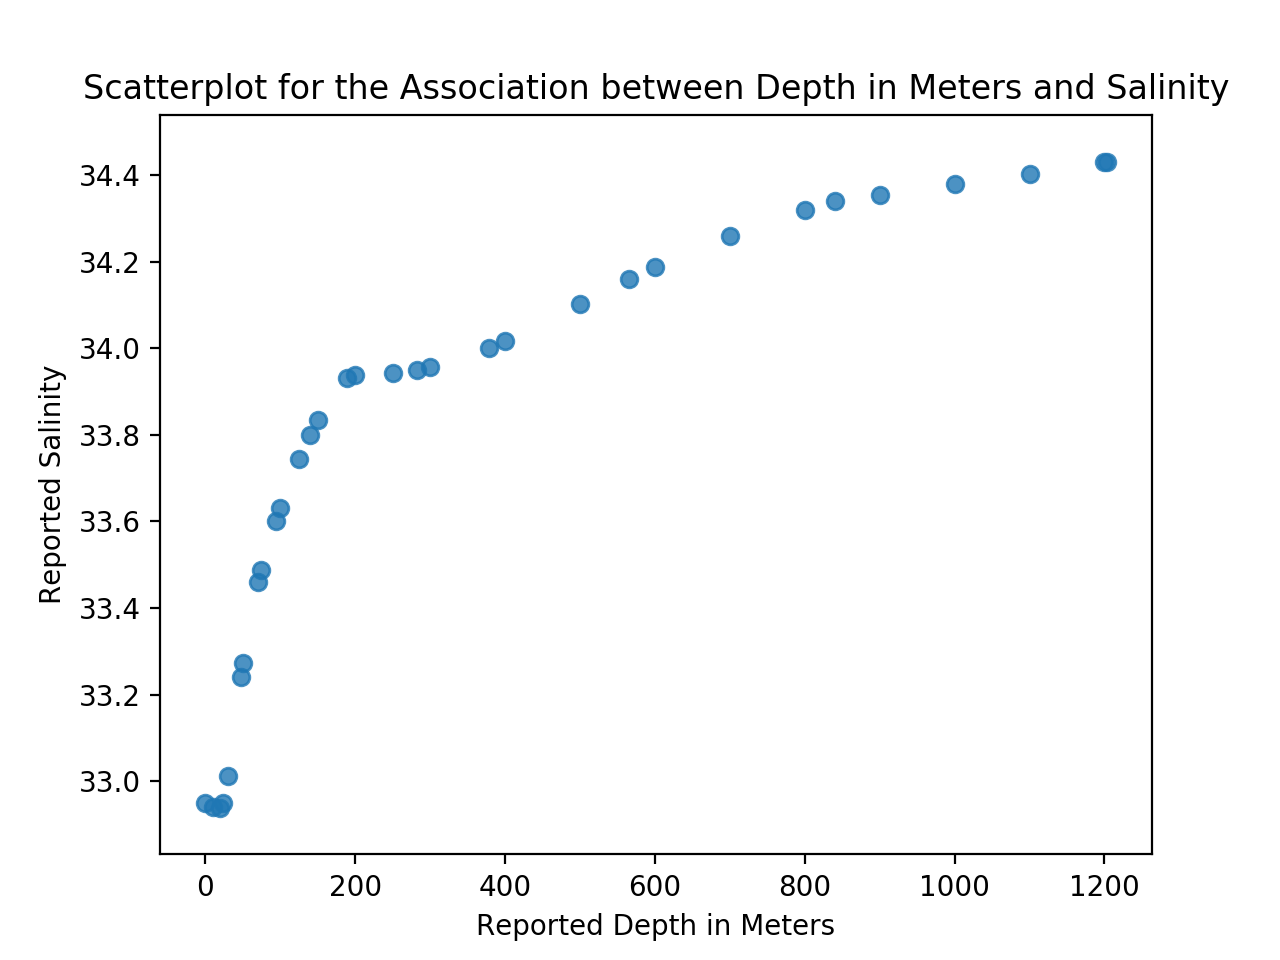

Text(0.5, 1.0, 'Scatterplot for the Association between Depth in Meters and Salinity')

In [25]:
%matplotlib notebook
plt.figure()

scat1 = sns.regplot(x='R_Depth', y='R_SALINITY', fit_reg=False, data=sub4)
plt.xlabel('Reported Depth in Meters')
plt.ylabel('Reported Salinity')
plt.title('Scatterplot for the Association between Depth in Meters and Salinity')